In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [38]:
df = pd.read_csv('../../../datasets/parte1/weatherAUS.csv')

#### Split Data

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
df['Month'] = df['Date'].dt.month
df.drop(['Date'], inplace=True, axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Drop columns which do not improve the model

In [40]:
#df.drop(['Location'], axis=1, inplace=True)

## Missing Values


#### Mean imputation in NA values

In [41]:
#df.drop(['Evaporation'], axis=1, inplace=True)
#df.drop(['Sunshine'], axis=1, inplace=True)
#df.drop(['Cloud9am'], axis=1, inplace=True)
#df.drop(['Cloud3pm'], axis=1, inplace=True)

In [42]:
# Numeric features
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)

df['MaxTemp'].fillna(df['MaxTemp'].mean() , inplace=True)

df['Rainfall'].fillna(df['Rainfall'].mean() , inplace=True)

df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean() , inplace=True)

df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean() , inplace=True)

df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean() , inplace=True)

df['Humidity9am'].fillna(df['Humidity9am'].mean() , inplace=True)

df['Humidity3pm'].fillna(df['Humidity3pm'].mean() , inplace=True)

df['Pressure9am'].fillna(df['Pressure9am'].mean() , inplace=True)

df['Pressure3pm'].fillna(df['Pressure3pm'].mean() , inplace=True)

df['Temp9am'].fillna(df['Temp9am'].mean() , inplace=True)

df['Temp3pm'].fillna(df['Temp3pm'].mean() , inplace=True)

df['Evaporation'].fillna(df['Evaporation'].mean() , inplace=True)

df['Sunshine'].fillna(df['Sunshine'].mean() , inplace=True)

df['Cloud9am'].fillna(df['Cloud9am'].mean() , inplace=True)

df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)

# Categorical features
# FAZEMOS ISTO PORQUE AS FEATURES CATEGORIAS ESTAO BEM DISTRIBUIDAS E PORTANTO A MODA NAO REPRESENTA UMA GRANDE PARTE DOS DADOS
categorical_features = [col for col in df.columns if df[col].dtype == object]
categorical_features.remove('RainTomorrow')
categorical_features.remove('RainToday')
categorical_features.remove('Location')

for col in categorical_features:
    values = df['WindDir3pm'].value_counts().index.values
    probs = df[col].value_counts(normalize=True).values
    df[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

In [43]:
df.dropna(inplace=True)

print(df.isna().sum())

df.shape

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


(123710, 18)

## Label encoding

In [44]:
label_encoder = LabelEncoder()

df['Location'] = label_encoder.fit_transform(df['Location'])
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

## Under sampling

In [45]:
# Separate features and labels
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

undersampler = RandomUnderSampler(random_state=2023)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['RainTomorrow'] = y_resampled

In [46]:
df_resampled.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,EncodedLocation,EncodedWindGustDir,EncodedWindDir9am,EncodedWindDir3pm,EncodedRainToday,EncodedRainTomorrow
34758,10.0,18.7,0.0,59.0,24.0,35.0,43.0,43.0,1006.10000,1007.800000,16.9,16.0,36,7,3,7,0,0
62627,8.7,23.4,0.0,35.0,9.0,19.0,86.0,51.0,1018.80000,1016.800000,13.4,22.7,33,2,14,9,0,0
22370,16.1,19.2,1.4,65.0,24.0,28.0,73.0,62.0,1014.80000,1014.300000,17.6,18.3,25,14,13,15,1,0
123833,15.8,32.0,0.0,54.0,15.0,30.0,60.0,37.0,1017.64994,1015.255889,23.5,30.4,34,11,11,11,0,0
57901,3.7,17.8,0.0,33.0,13.0,9.0,67.0,36.0,1019.10000,1017.600000,10.6,17.0,4,9,9,9,0,0


In [47]:
df_resampled.to_csv('../../../datasets/parte1/dataset_cleaned.csv', index=False)


/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


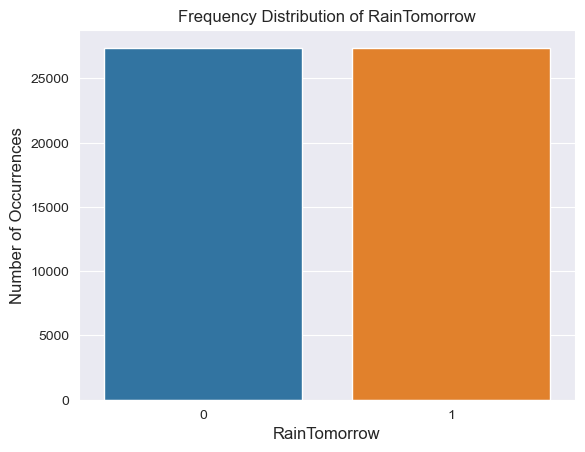

In [48]:
raintomorrow_count = df_resampled['RainTomorrow'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintomorrow_count.index, y=raintomorrow_count.values)
plt.title('Frequency Distribution of RainTomorrow')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()